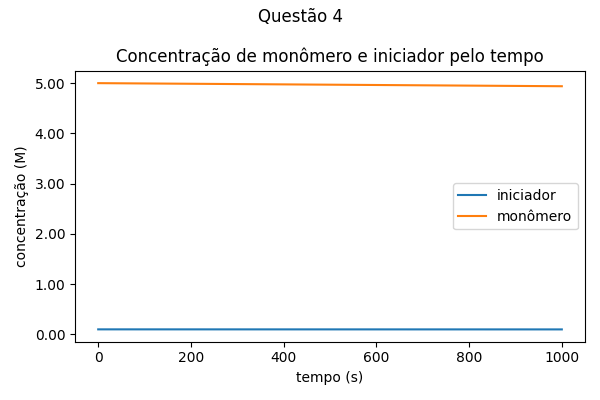

In [1]:
import pandas as pd
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time
from matplotlib.ticker import FormatStrFormatter

def rk4(f, Y0, time_window, args=None, h=1e-2, ordem=4):
    """
    Resolve um sistema de equações diferenciais ordinárias (EDOs) utilizando o método de Runge-Kutta de quarta ordem.

    Args:
        f: função que retorna a derivada da função Y em relação ao tempo. Deve receber dois argumentos: t e Y.
        Y0: lista ou array contendo as condições iniciais para as funções Y. Deve ter o mesmo comprimento que o número de equações em f.
        time_window: lista ou tupla contendo o tempo inicial (t0) e o final (tf).
        h: tamanho do passo.

    Returns:
        Uma tupla contendo dois arrays: o primeiro com o tempo (t) e o segundo com as soluções do sistema de EDOs para cada tempo (Y).
    """
    # usando args
    if args is not None:
        # Wrap the user's fun (and jac, if given) in lambdas to hide the
        # additional parameters.  Pass in the original fun as a keyword
        # argument to keep it in the scope of the lambda.
        try:
            _ = [*(args)]
        except TypeError as exp:
            suggestion_tuple = (
                "Supplied 'args' cannot be unpacked. Please supply `args`"
                f" as a tuple (e.g. `args=({args},)`)"
            )
            raise TypeError(suggestion_tuple) from exp

        f = lambda t, x, f=f: f(t, x, *args)
    # Calcula o número total de passos a serem dados
    t0, tf = time_window
    n = int((tf-t0)/h)

    # Cria arrays para armazenar os resultados
    t = np.zeros(n+1)
    Y = np.zeros((n+1, len(Y0)))
    Y[0] = Y0
    t[0] = t0
    
    # Aplica o método de Runge-Kutta de quarta ordem
    for i in range(n):
        if ordem<=1:
            k1 = h*np.array(f(t[i], Y[i]))
            # print(k1)
            Y[i+1] = Y[i] + k1
        else:
            k1 = h*np.array(f(t[i], Y[i]))
            k2 = h*np.array(f(t[i] + h/2, Y[i] + k1/2))
            k3 = h*np.array(f(t[i] + h/2, Y[i] + k2/2))
            k4 = h*np.array(f(t[i] + h, Y[i] + k3))
            Y[i+1] = Y[i] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        t[i+1] = t[i] + h
    
    # Retorna os resultados como uma tupla de arrays
    return t, Y

def edo(t, y, *dados):
    f_, kd_, kp_, ktd_, ktc_, Ci0_, Cm0_ = dados
    Y0, Y1, Y2, Q0, Q1, Q2, Ci, Cm = y
    # derivadas no tempo
    dY0 = 2*f_*kd_*Ci -(ktc_+ktd_)*Y0**2
    dY1 = kp_*Cm*Y0 -(ktc_+ktd_)*Y0*Y1
    dY2 = kp_*Cm*Y0 +2*kp_*Cm*Y1 -(ktc_+ktd_)*Y0*Y2
    dQ0 = (ktd_+ktc_/2)*Y0**2
    dQ1 = (ktc_+ktd_)*Y0*Y1
    dQ2 = (ktc_+ktd_)*Y0*Y2 + ktc_*Y1**2
    dCi = -kd_*Ci
    dCm = -kp_*Cm*Y0
    return [dY0, dY1, dY2, dQ0, dQ1, dQ2, dCi, dCm]

dados = [6e-1, 1e-5, 1.6e2, 1e8, 1e8, 1e-1, 5]
intervalo_tempo = [0, 1000]
t, concentrações = rk4(edo, [0, 0, 0, 0, 0, 0, dados[-2], dados[-1]], intervalo_tempo, args=dados)


# df = pd.DataFrame(concentrações)
# df.to_excel("output3.xlsx")
fig, ax = plt.subplots()
plt.rcParams["figure.autolayout"] = True
ax.set_xlabel('tempo (s)')
ax.set_ylabel('concentração (M)')
fig.suptitle('Questão 4', fontsize=12)
fig.set_figwidth(6)
fig.set_figheight(4)
fig.set_dpi(142)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_title("Concentração de monômero e iniciador pelo tempo")
concentrações = np.transpose(concentrações)
plt.plot(t, concentrações[-2], label="iniciador")
plt.plot(t, concentrações[-1], label="monômero")
plt.legend()
plt.show()

